# Analisis de datos con Machine Learning.

## Regresion Lineal Simple. Uso de servicio de datos.


## Importacion de liberias 

In [304]:
# Importacion de librerias de analisis de datos.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import datetime class from datetime module
import time
import datetime
from datetime import date
%matplotlib inline
# Importar el modelo de seleccion de variables del entreamiento y prueba.
from sklearn.model_selection import train_test_split
# Importar el modelo de Regresión Lienal Simple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression


In [306]:
# Importar el data set desde el archivo CSV
df = pd.read_csv('AllTxBytes-2019V3.csv')

In [307]:
df

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,...,3.560000e+02,3.570000e+02,3.580000e+02,3.590000e+02,3.600000e+02,3.610000e+02,3.620000e+02,3.630000e+02,3.640000e+02,3.650000e+02
1,1.500000e+12,1.550000e+12,1.550000e+12,1.620000e+12,1.560000e+12,1.670000e+12,1.550000e+12,1.540000e+12,1.560000e+12,1.570000e+12,...,2.520000e+12,2.450000e+12,2.230000e+12,2.490000e+12,2.560000e+12,2.600000e+12,2.520000e+12,2.560000e+12,2.540000e+12,2.180000e+12


In [308]:
# Asignacion de nombre de filas.
df.rename(
  index ={
    0 : 'fecha',
    1 : 'tx_bytes'
 },
  inplace=True
)

In [309]:
# Formato de los datos esta filas.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
fecha,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,...,3.560000e+02,3.570000e+02,3.580000e+02,3.590000e+02,3.600000e+02,3.610000e+02,3.620000e+02,3.630000e+02,3.640000e+02,3.650000e+02
tx_bytes,1.500000e+12,1.550000e+12,1.550000e+12,1.620000e+12,1.560000e+12,1.670000e+12,1.550000e+12,1.540000e+12,1.560000e+12,1.570000e+12,...,2.520000e+12,2.450000e+12,2.230000e+12,2.490000e+12,2.560000e+12,2.600000e+12,2.520000e+12,2.560000e+12,2.540000e+12,2.180000e+12


In [310]:
# Es necesario cambiar de filas a columnas y asignarlo a un nuevo dataframe.

df_Trafico=df.T

In [311]:
# Verificación del resultado.
df_Trafico.head()

,fecha,tx_bytes
0,1.0,1.500000e+12
1,2.0,1.550000e+12
2,3.0,1.550000e+12
3,4.0,1.620000e+12
4,5.0,1.560000e+12


In [324]:
print("Dataset: {}".format(df_Trafico.shape))

Dataset: (365, 2)


In [325]:
print("Columns: {}".format(df_Trafico.columns))


Columns: Index(['fecha', 'tx_bytes'], dtype='object')


In [312]:
# Asignacion de variables dependiente e independiente para el analisis.
X = df_Trafico.iloc[:, :-1].values
y = df_Trafico.iloc[:, 1].values


In [313]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing al 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [334]:
# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento
regression = LinearRegression()
# Con el metodo fit se entrena el modelo con los datos de entrenamiento.
modelo = regression.fit(X_train, y_train)

In [336]:
r_sq = modelo.score(X_train, y_train)

In [337]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7798338892304097


In [339]:
print('intercept:', modelo.intercept_)

intercept: 1552316603506.5942


In [340]:
print('coefficients:', modelo.coef_)

coefficients: [2.53076891e+09]


In [341]:
# Evaluacion del conjunto de test
y_pred = regression.predict(X_test)


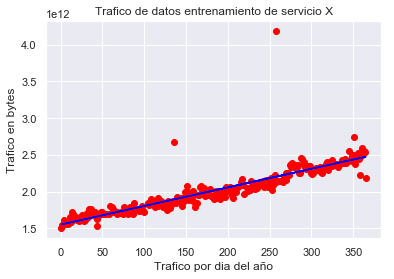

In [319]:
# Visualizar los resultados de entrenamiento
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Trafico de datos entrenamiento de servicio X")
plt.xlabel("Trafico por dia del año")
plt.ylabel("Trafico en bytes")
plt.show()

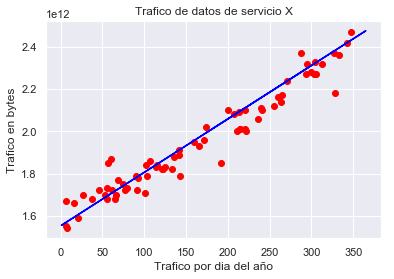

In [318]:
# Visualizar los resultados de test
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Trafico de datos Test de servicio X ")
plt.xlabel("Trafico por dia del año")
plt.ylabel("Trafico en bytes")
plt.show()

In [345]:
print("La presición del modelo es :"+ str(round(modelo.score(X_train,y_train)*100,2))+"%")

La presición del modelo es :77.98%


In [393]:
df1 = pd.read_csv('AllTxBytes-2019V5.csv')

In [394]:
# Asignacion de nombre de filas.
df1.rename(
  index ={
    0 : 'fecha',
    1 : 'tx_bytes'
 },
  inplace=True
)

In [395]:
df_Trafico1=df1.T

In [396]:
X = df_Trafico1.iloc[:, :-1].values
y = df_Trafico1.iloc[:, 1].values


In [397]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing al 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [398]:
# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento
regression = LinearRegression()
# Con el metodo fit se entrena el modelo con los datos de entrenamiento.
modelo = regression.fit(X_train, y_train)

In [399]:
# Evaluacion del conjunto de test
y_pred = regression.predict(X_test)

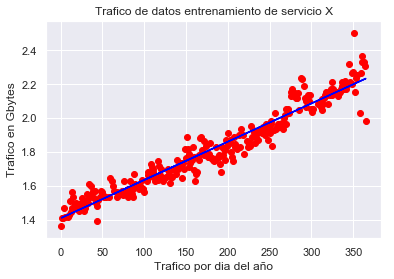

In [402]:
# Visualizar los resultados de entrenamiento
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regression.predict(X_train), color = "blue")
plt.title("Trafico de datos entrenamiento de servicio X")
plt.xlabel("Trafico por dia del año")
plt.ylabel("Trafico en Gbytes")
plt.show()

In [403]:
print("La presición del modelo es :"+ str(round(modelo.score(X_train,y_train)*100,2))+"%")

La presición del modelo es :93.69%


In [409]:
r_sq = modelo.score(X_train, y_train)
print("La presición del modelo es :"+ str(round(r_sq*100,2))+"%")

La presición del modelo es :93.69%


In [413]:
print('Intercepción inicio de año 2019: '+ str(round(modelo.intercept_,2))+"Gb")

Intercepción inicio de año 2018: 1.41Gb


In [414]:
print('Coefficiente:', modelo.coef_)

Coefficiente: [0.00225453]


In [424]:
print("Ecuacion : y ="+str(round(modelo.intercept_,2))+' + '+str(modelo.coef_)+"x")

Ecuacion : y =1.41 + [0.00225453]x


In [438]:
print("Estimación a fin del año 2020 "+str(round( 1.41+0.00225*730,2))+" [Gb]" )

Estimación a fin del año 2020 3.05 [Gb]
